Load and Visualize Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Preprocessing

In [3]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

 PCA for 2D visualization:

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

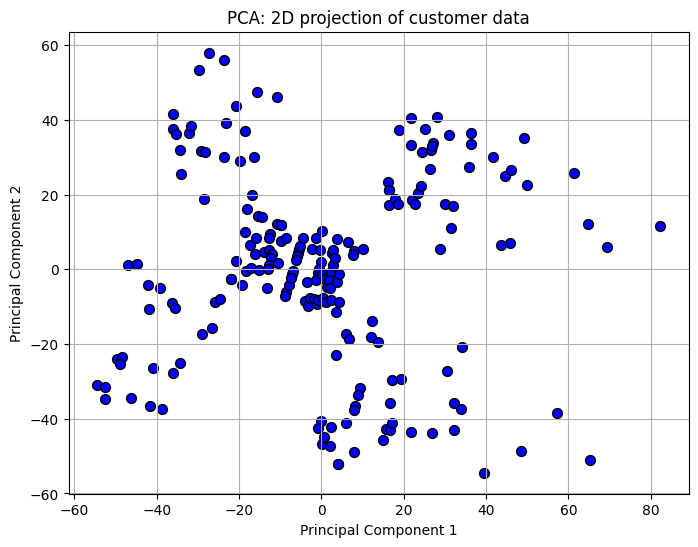

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA: 2D projection of customer data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.savefig('plots/pca_visualization.png')  
plt.show()


Elbow Method to Find Optimal K

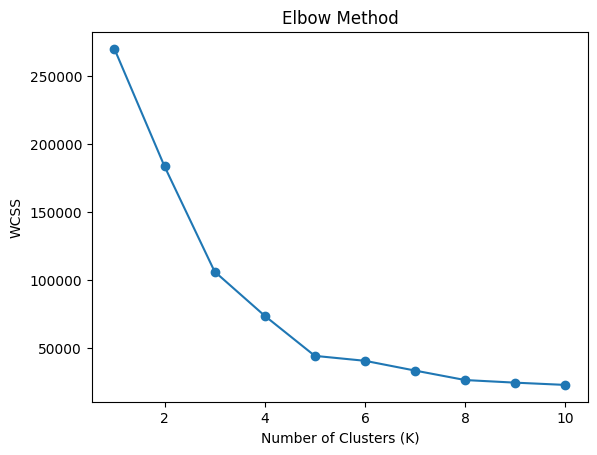

In [6]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.savefig('plots/elbow_plot.png')
plt.show()

 Fit KMeans

In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters

Visualize Clusters

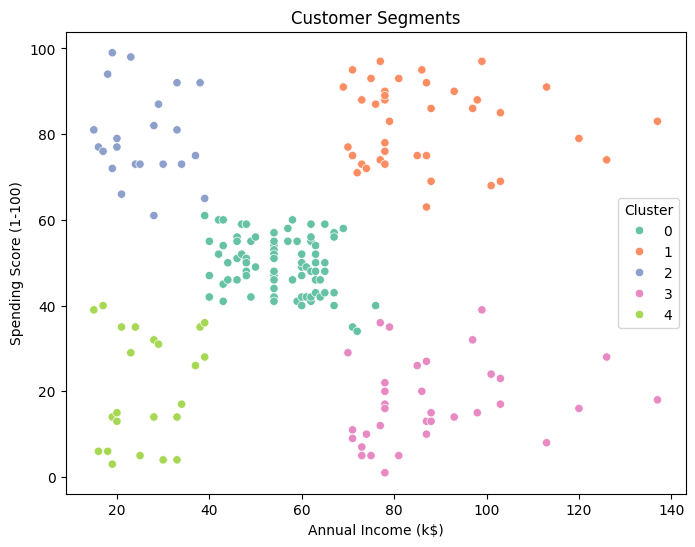

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set2')
plt.title('Customer Segments')
plt.savefig('plots/customer_clusters.png')
plt.show()

Evaluate with Silhouette Score

In [9]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, clusters)
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.554
